# 그래프 연산

In [ ]:
class add_graph:
  def __init__(self): #  - `__init__` 메서드는 클래스의 생성자로, 객체가 생성될 때 한 번 호출됩니다. 여기에서 `self`는 생성되는 인스턴스를 가리킵니다.
    pass  # pass를 사용함으로써 코드는 문법적으로 올바르게 유지되면서 아무런 동작도 수행하지 않습니다.
  def forward(self,x,y): # forward` 메서드는 두 개의 숫자를 더하는 작업을 수행합니다. 여기에서 `self`는 해당 인스턴스를 가리키며, `x`와 `y`는 메서드에 전달된 매개변수입니다.
    out = x+y
    return out
  def backward(self,dout): # backward` 메서드는 미분 값에 대한 역전파를 수행합니다. `dout`은 미분 값
    dx = 1 * dout
    dy = 1 * dout
    return dx, dy


In [ ]:
class mul_graph:
  def __init__(self):
    self.x =None # self.x 값 null 이라도 정의
    self.y=None
  def forward(self,x,y):
    self.x=x # self 에 있는 x
    self.y=y
    out = x*y
    return out
  def backward(self, dout): # 체인룰
    dx = self.y * dout # x에 대한 미분값
    dy = self.x * dout # y에 대한 미분값
    return dx,dy


In [ ]:
class mse_graph:
  def __init__(self):
    self.loss = None # null
    self.y= None
    self.t =None
    self.x = None
  def forward(self, y, t):
    self.t = t # 실제 정답(ground truth) 데이터
    self.y = y #모델의 예측값
    self.loss = np.square(self.t-self.y).sum()/ self.t.shape[0] # sum 배열의 모든 원소를 더함, / self.t.shape[0]: 데이터 포인트의 개수로 나누어 평균을 계산
    # 평균 제곱 오차(Mean Squared Error, MSE)를 계산하는 부분입니다. MSE는 회귀 문제에서 모델의 예측값과 실제 값 간의 차이를 제곱한 것들의 평균을 나타내는 지표
    return self.loss # 모델의 현재 예측이 실제 값과 얼마나 차이나는지를 나타내는 평균 제곱 오차가 저장

  def backward(self, x , dout=1):
    data_size = self.t.shape[0]
    dweight_mse = (((self.y - self.t)*x).sum()*2/data_size) # 평균 제곱 오차(Mean Squared Error, MSE) 손실 함수에 대한 가중치(weight)에 대한 편미분값을 계산
    dbias_mse = (self.y-self.t).sum()*2 / data_size
    return  dweight_mse, dbias_mse


In [ ]:
apple = 100
apple_num= 2
orange = 150
orange_num = 3
tax =1.1

In [ ]:
mul_apple_graph = mul_graph() # 곱셈
mul_orange_graph = mul_graph() # 곱셈
add_apple_orange_graph = add_graph() # 덧셈
mul_tax_graph = mul_graph() # 곱셈

In [ ]:
apple_price=mul_apple_graph.forward(apple, apple_num) # 사과 가격, 사과 갯수 - 총 사과 가격
orange_price = mul_orange_graph.forward(orange, orange_num)  # 오렌지 가격, 오렌지 갯수 -  총 오렌지 가격
all_price = add_apple_orange_graph.forward(apple_price, orange_price) # 총 사과가격 + 오렌지 가격
total_price = mul_tax_graph.forward(all_price, tax) # all price 미분값
print(total_price)# total 가격

715.0000000000001


In [ ]:
1.1+0.1 == 1.2  # float 값은 일부의 오차가 존재하기 때문에 false 가 나와( 이진화 에러로 인해서 )

False

In [ ]:
1+1 ==2

True

In [ ]:
dprice = 1
dall_price, dtax = mul_tax_graph.backward(dprice)
dapple_price, dorange_price = add_apple_orange_graph.backward(dall_price)
dorange, dorange_num = mul_orange_graph.backward(dorange_price)
dapple, dapple_num = mul_apple_graph.backward(dapple_price)

print('dApple', dapple)
print('dApple_num', dapple_num)
print('dOrange',dorange)
print('dOrange_num',dorange_num)


dApple 2.2
dApple_num 110.00000000000001
dOrange 3.3000000000000003
dOrange_num 165.0


In [ ]:
import numpy as np


In [ ]:
def celcius_to_fahrenheit(x):
  return x+1.8+32

In [ ]:
weight = np.random.uniform(0, 5, 1)
print(weight)
bias = 0

[0.99089477]


In [ ]:
data_C = np.arange(0, 100)
data_F = celcius_to_fahrenheit(data_C)
scaled_data_C = data_C/ 100
scaled_data_F = data_F / 100
print(scaled_data_C)
print(scaled_data_F)


[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]
[0.338 0.348 0.358 0.368 0.378 0.388 0.398 0.408 0.418 0.428 0.438 0.448
 0.458 0.468 0.478 0.488 0.498 0.508 0.518 0.528 0.538 0.548 0.558 0.568
 0.578 0.588 0.598 0.608 0.618 0.628 0.638 0.648 0.658 0.668 0.678 0.688
 0.698 0.708 0.718 0.728 0.738 0.748 0.758 0.768 0.778 0.788 0.798 0.808
 0.818 0.828 0.838 0.848 0.858 0.868 0.878 0.888 0.898 0.908 0.918 0.928
 0.938 0.948 0.958 0.968 0.978 0.988 0.998 1.008 1.018 1.028 1.038 1.048
 1.058 1.068 1.078 1.088 1.098 1.108 1.118 1.128 1.13

In [ ]:
weight_graph = mul_graph()
bias_graph = add_graph()

In [ ]:
weighted_data = weight_graph.forward(weight, scaled_data_C)
predict_data = bias_graph.forward(weighted_data, bias)
print(predict_data) # 틀린 값 100가 만들어짐.

[0.         0.00990895 0.0198179  0.02972684 0.03963579 0.04954474
 0.05945369 0.06936263 0.07927158 0.08918053 0.09908948 0.10899842
 0.11890737 0.12881632 0.13872527 0.14863422 0.15854316 0.16845211
 0.17836106 0.18827001 0.19817895 0.2080879  0.21799685 0.2279058
 0.23781474 0.24772369 0.25763264 0.26754159 0.27745054 0.28735948
 0.29726843 0.30717738 0.31708633 0.32699527 0.33690422 0.34681317
 0.35672212 0.36663107 0.37654001 0.38644896 0.39635791 0.40626686
 0.4161758  0.42608475 0.4359937  0.44590265 0.45581159 0.46572054
 0.47562949 0.48553844 0.49544739 0.50535633 0.51526528 0.52517423
 0.53508318 0.54499212 0.55490107 0.56481002 0.57471897 0.58462791
 0.59453686 0.60444581 0.61435476 0.62426371 0.63417265 0.6440816
 0.65399055 0.6638995  0.67380844 0.68371739 0.69362634 0.70353529
 0.71344423 0.72335318 0.73326213 0.74317108 0.75308003 0.76298897
 0.77289792 0.78280687 0.79271582 0.80262476 0.81253371 0.82244266
 0.83235161 0.84226055 0.8521695  0.86207845 0.8719874  0.881896

In [ ]:
dout = 1
dbias, dweighted_data = bias_graph. backward(dout)
dweight, dscaled_data_C = weight_graph.backward(dweighted_data)
print(dbias) # bias의 미분값은 1
print(dweight) # dweight의 미분값은 100개가 나옴.  # mse 에러 값을 낼때 평균낸다는 의미

1
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99]


In [ ]:
mseGraph = mse_graph()
mse = mseGraph.forward(predict_data, scaled_data_F)
print(mse)

0.11731801384587186


In [ ]:
weight_mse_gradient, bias_mse_gradient = mseGraph.backward(scaled_data_C)
print(weight_mse_gradient)
print(bias_mse_gradient)

-0.34059940426425894
-0.6850141772828023


In [ ]:
learning_rate=0.1
learned_weight=weight- \
  learning_rate * weight_mse_gradient * np.average(dweight)
print('before learning weight:',weight)
print('after learning weight:',learned_weight)

before learning weight: [0.99089477]
after learning weight: [1.00775444]


In [ ]:
learned_bias = bias - learning_rate *bias_mse_gradient * dbias
print('before learning bias:',bias)
print('after learning bias:',learned_bias)

before learning bias: 0
after learning bias: 0.06850141772828024


In [ ]:
error_list = []
weight_list = []
bias_list = []
for i in range(1000):
  #forward
  weighted_data = weight_graph.forward(weight, scaled_data_C)
  predict_data = bias_graph.forward(weighted_data, bias)
  # backward
  dout = 1
  dbias, dweighted_data = bias_graph.backward(dout)
  dweight, dscaled_data_C =  weight_graph.backward(dweighted_data)
  #mse
  mse = mseGraph.forward(predict_data, scaled_data_F)
  error_list.append(mse)
  weight_mse_gradient, bias_mse_gradient = \
    mseGraph.backward(scaled_data_C)
  #learning
  weight_list.append(weight)
  weight = weight - learning_rate * weight_mse_gradient * np.average(dweight)
  # 경사 하강법을 사용하여 가중치 업데이트
# weight: 현재의 가중치
# learning_rate: 학습률, 가중치 업데이트의 크기를 결정
# weight_mse_gradient: 평균 제곱 오차(Mean Squared Error)에 대한 가중치의 기울기
# np.average(dweight): 가중치에 대한 평균 기울기(각 샘플에 대한 기울기의 평균)

  bias_list.append(bias)
  bias = bias - learning_rate * bias_mse_gradient * dbias
weight_list.append(weight)
bias_list.append(bias)
print(weight)
print(bias)

[1.00004352]
0.33797763810342


In [ ]:
print(error_list[-1])

1.6084043320611833e-10


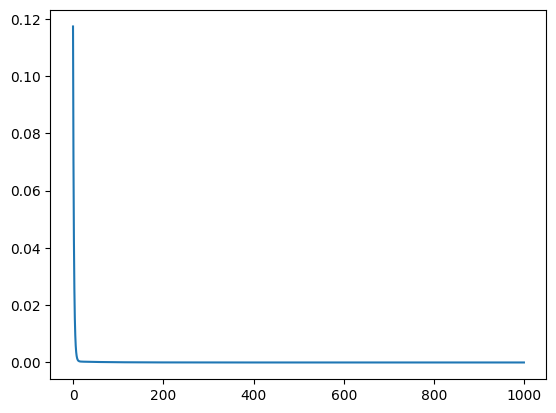

In [ ]:
import matplotlib.pyplot as plt
plt.plot(error_list)
plt.show()

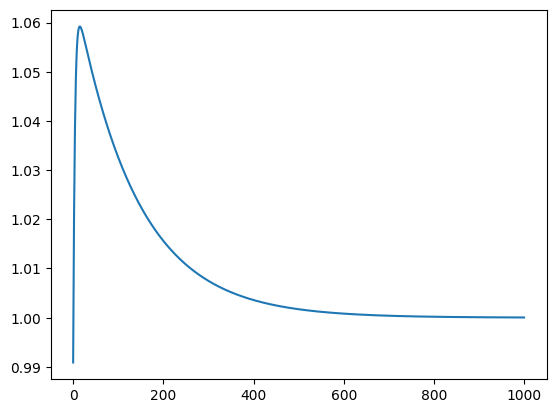

In [ ]:
plt.plot(weight_list)
plt.show()

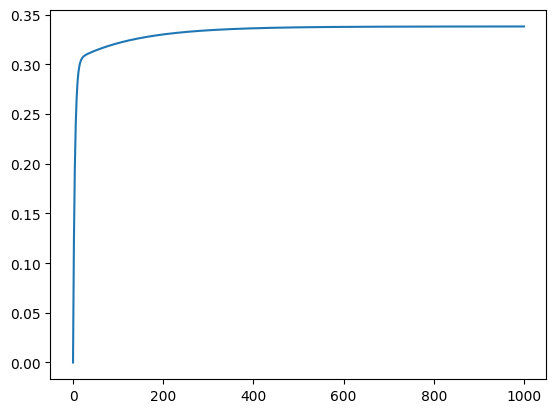

In [ ]:
plt.plot(bias_list)
plt.show()